## Lab 1: Brownian Motion ##



In [1]:
# Imports
import numpy as np
import scipy.stats as sci
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [29]:
def box_muller(size, plot=True):

    U1 = np.random.uniform(size=size)
    U2 = np.random.uniform(size=size)

    r = np.sqrt(-2 * np.log(U1))
    theta = 2*np.pi*U2

    X = r * np.cos(theta)
    Y = r * np.sin(theta)

    n_bins=100
    if plot==True:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
        # x-normal
        temp_X = ax1.hist(X, bins=n_bins, density=True)
        ax1.set_title("X~N(0,1)")

        # y-normal
        temp_Y = ax2.hist(Y, bins=n_bins, density=True)
        ax2.set_title("Y~N(0,1)")

        x_line = np.linspace(temp_X[1][0], temp_X[1][-1], len(temp_X[1]))
        y_line = np.linspace(temp_Y[1][0], temp_Y[1][-1], len(temp_Y[1]))
        pdfX = sci.norm.pdf(x_line, 0, 1)
        pdfY = sci.norm.pdf(y_line, 0, 1)

        # lin-log x-norm
        temp = ax3.hist(X, bins=n_bins, density=True)
        ax3.set_yscale('log')
        ax3.set_title("lin-log X")

        #lin-log y-norm
        temp = ax4.hist(Y, bins=n_bins, density=True)
        ax4.set_yscale('log')
        ax4.set_title("lin-log Y")

        ax3.plot(x_line, pdfX, 'r--', lw=1.5)
        ax4.plot(y_line, pdfY, 'r--', lw=1.5)
        
        plt.tight_layout()
        plt.show()
    
    # returns normals, box-muller samples
    print(f"X: mu = <{np.mean(X):.4f}> , var = {np.var(X):.4f}")
    print(f"X: mu = <{np.mean(Y):.4f}> , var = {np.var(Y):.4f}")
    return U1, U2, X, Y

In [55]:
def periodic_boundary(x, y, L):

    x_pbc = ((x + L/2) % L) - L/2
    y_pbc = ((y + L/2) % L) - L/2

    return x_pbc, y_pbc

In [ ]:
def euler_mayurama(g_x, g_y, Gamma=1, gamma=1, n_steps=1000, mod=False, L=4, origin=True):
    dt = 1/n_steps
    t = np.arange(0, 1, dt)

    # (_x,_y):= position of particle at time t
    _x = np.zeros(len(t))
    _y = np.zeros(len(t))
    msd = np.zeros(len(t))

    if origin==False:
        _x[0] = np.random.uniform(-L/2,L/2)
        _y[0] = np.random.uniform(-L/2,L/2)

    for t in range(0, len(t)-1):
        # Select random x-jump and y-jump
        i = np.random.randint(0, len(g_x))
        j = np.random.randint(0, len(g_y))

        # Update
        if mod==True: 
            ''' 
            This way produces plotting artifacts.
            -> Compute non-periodic and do modulo math later            
            '''
            _x[t+1] = ((_x[t+1] + L/2) % L) - L/2
            _y[t+1] = ((_y[t+1] + L/2) % L) - L/2
            
        else:
            _x[t+1] = _x[t] + (g_x[i]/gamma) * np.sqrt(2*Gamma*dt)
            _y[t+1] = _y[t] + (g_y[j]/gamma) * np.sqrt(2*Gamma*dt)
    
    # Time-lag MSD
    for tau in range(1, t): 
        delta = (_x[tau:] - _x[:-tau])**2 + (_y[tau:] - _y[:-tau])**2
        msd[tau] = np.mean(delta)
        
    return _x, _y, msd

In [25]:
# Test distributions
N=10000
U1,U2,X,Y=box_muller(1234, N)

X: mu = <0.0542> , var = 0.9931
X: mu = <0.0139> , var = 0.9371


X: mu = <0.0153> , var = 0.9926
X: mu = <-0.0106> , var = 0.9788


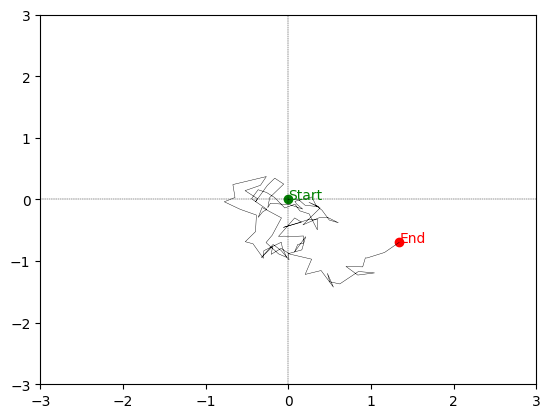

In [ ]:
## SINGLE PARTICLE BROWNIAN MOTION ##
N=10000
plot_dist=False
x,y,g_x,g_y = box_muller(N, plot_dist)
Gamma=1
gamma=1
dt=0.001
n_steps=100
t = np.arange(0, 1+dt, dt)

_x,_y, msd = euler_mayurama(g_x, g_y, Gamma, gamma, n_steps=n_steps, mod=False)


## --------------------- MAKE PRETTIER ----------------------
plt.scatter(_x[0], _y[0], color="g")
plt.text(_x[0], _y[0], color='g', s="Start")

plt.scatter(_x[-1], _y[-1], color="r")
plt.text(_x[-1], _y[-1], color='r', s="End")

plt.plot(_x,_y, color='black', linewidth="0.3")
plt.axvline(x=0,color='black', linestyle='--', linewidth="0.3")
plt.axhline(y=0,color='black', linestyle='--', linewidth="0.3")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

X: mu = <0.0099> , var = 0.9838
X: mu = <0.0110> , var = 0.9898


/var/folders/_m/vj49vq3972b166bph370j1kw0000gn/T/ipykernel_24655/3822708795.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma_r')


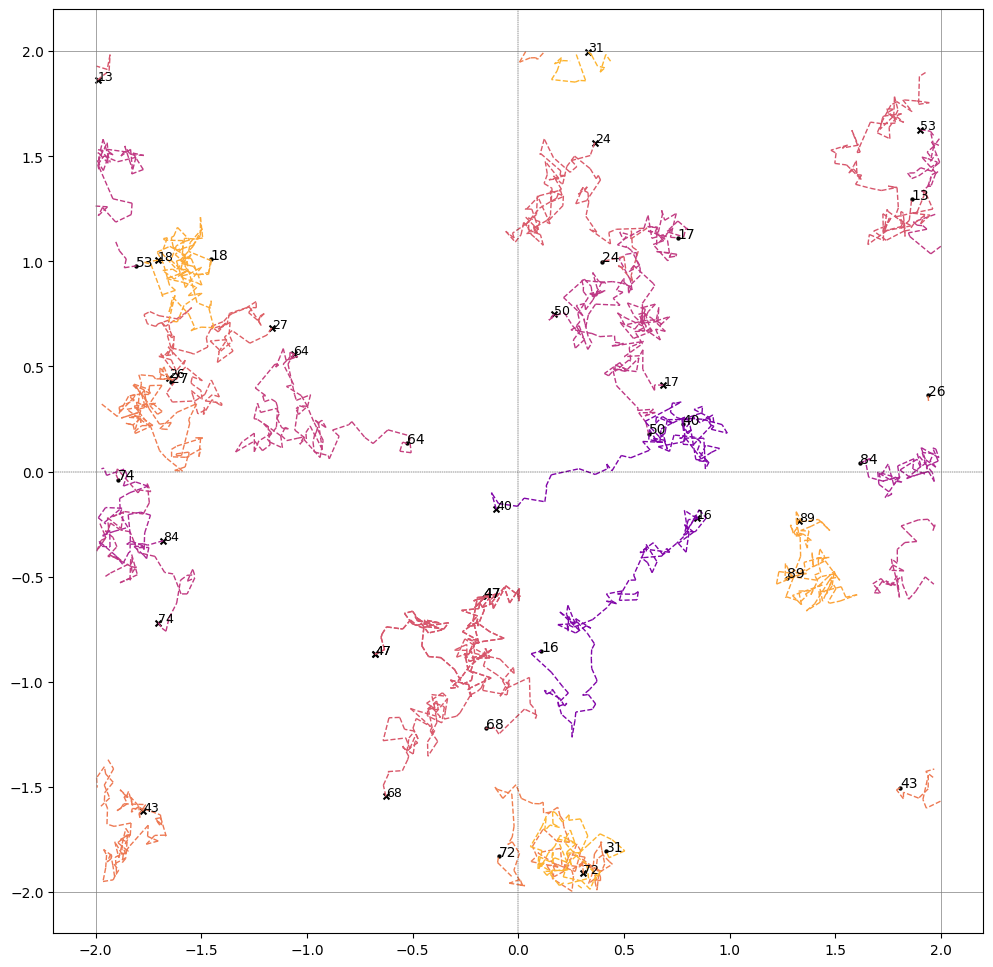

In [80]:
N=10000
plot_dist=False
x,y,g_x,g_y = box_muller(N, plot_dist)
Gamma=0.1
gamma=1

n_steps=100
n_particles=100
particles=np.array([[0.0, 0.0, 0.0, 0.0, 0.0] for n in range(n_particles)]) #x0,y0,xf,yf,msd
particle_data = np.zeros((n_particles, n_steps, 2))
particle_data_unbounded = np.zeros((n_particles, n_steps, 2))
particle_msd = np.zeros((n_particles, n_steps))

L=4
dt=0.01
t = np.arange(0, 1+dt, dt)

# per particle
fig,ax=plt.subplots(figsize=(12,12))
for n in range(n_particles):
    _x,_y, msd = euler_mayurama(g_x, g_y, Gamma, gamma, n_steps, mod=False, L=L, origin=False)
    particle_data_unbounded[n, :, 0] = _x
    particle_data_unbounded[n, :, 1] = _y
    particle_msd[n]=msd

    _x,_y = periodic_boundary(_x, _y, L)

    particles[n]=[_x[1],_y[1],_x[-1], _y[-1],0.0]
    particle_data[n, :, 0] = _x
    particle_data[n, :, 1] = _y
    

    #plt.scatter(_x[0], _y[0], color="black", marker='x',s=2)
    #plt.scatter(_x[-1], _y[-1], color="black", marker='o',s=2)

cmap = cm.get_cmap('plasma_r')


# for graphics
net_disp = np.sqrt((particle_data_unbounded[:,n_steps-1,0]-particle_data_unbounded[:,0,0])**2 
                   + (particle_data_unbounded[:,n_steps-1,1]-particle_data_unbounded[:,0,1])**2)
max_msd=np.max(net_disp)

rand_sel = np.random.randint(1, n_particles, size=20)
for _,n in enumerate(rand_sel):
    colormap = net_disp[n] / max_msd
    color_msd = cmap(colormap) #msd
    for i in range(n_steps - 1):
        x1, x2 = particle_data[n][i][0], particle_data[n][i + 1][0]
        y1, y2 = particle_data[n][i][1], particle_data[n][i + 1][1]
        dist = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        if dist <= (L/2) - 0.001:
            plt.plot([x1, x2], [y1, y2], 
                     color=color_msd, 
                     linewidth=1, 
                     linestyle="--")
    
    plt.text(particle_data[n][0][0], particle_data[n][0][1], color='black', s=n, fontsize=9)
    plt.scatter(particle_data[n][0][0], particle_data[n][0][1], color="black", marker='x',s=18)

    plt.text(particle_data[n][-1][0], particle_data[n][-1][1], color='black', s=n, fontsize=10)
    plt.scatter(particle_data[n][-1][0], particle_data[n][-1][1], color="black", marker='.',s=18)

# (0,0) and Boundary Lines #
plt.axvline(x=0,color='black', linestyle='--', linewidth="0.3")
plt.axhline(y=0,color='black', linestyle='--', linewidth="0.3")

plt.axvline(-L/2, color='gray', lw=0.5)
plt.axvline(L/2, color='gray', lw=0.5)
plt.axhline(-L/2, color='gray', lw=0.5)
plt.axhline(L/2, color='gray', lw=0.5)

plt.show()

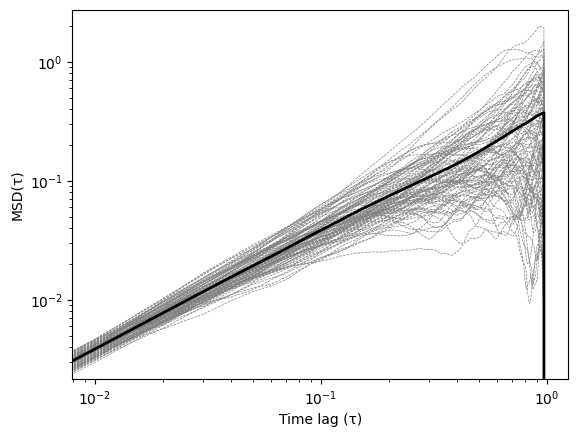

In [66]:
t = np.arange(0, 1, dt)
for _, _msd in enumerate(particle_msd):
    plt.loglog(t, _msd,
               color='gray', linewidth=0.5, linestyle="--")
plt.loglog(t,np.mean(particle_msd, axis=0), linewidth=2, color='black')
plt.xlabel("Time lag (τ)")
plt.ylabel("MSD(τ)")
plt.show()
